In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\SUPRAJA\Downloads\adult 3.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
data.info()
(data=='?').sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [3]:
data.workclass.replace({'?':'NotListed'},inplace=True)
data.occupation.replace({'?':'NotListed'},inplace=True)
data['native-country'].replace({'?':'NotListed'},inplace=True)

C:\Users\SUPRAJA\AppData\Local\Temp\ipykernel_7812\3027175138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'NotListed'},inplace=True)
C:\Users\SUPRAJA\AppData\Local\Temp\ipykernel_7812\3027175138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [4]:
data['hours-per-week'].value_counts()

hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
87        1
94        1
82        1
79        1
Name: count, Length: 96, dtype: int64

In [5]:
data['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [6]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
data.drop(columns=['education','marital-status','fnlwgt','relationship','race','capital-gain','capital-loss','native-country'],inplace=True)

In [8]:
data.head()

,age,workclass,educational-num,occupation,gender,hours-per-week,income
0,25,Private,7,Machine-op-inspct,Male,40,<=50K
1,38,Private,9,Farming-fishing,Male,50,<=50K
2,28,Local-gov,12,Protective-serv,Male,40,>50K
3,44,Private,10,Machine-op-inspct,Male,40,>50K
4,18,NotListed,10,NotListed,Female,30,<=50K


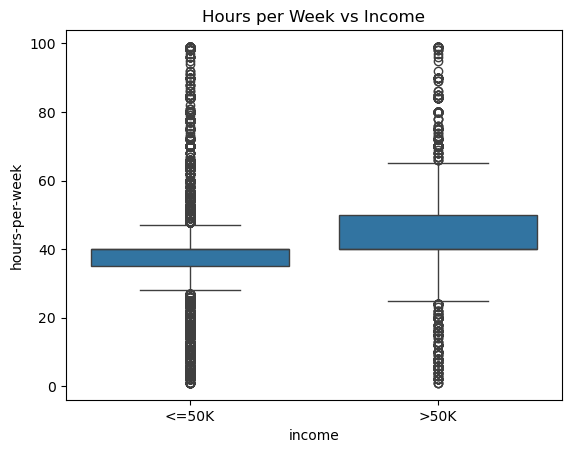

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title('Hours per Week vs Income')
plt.show()


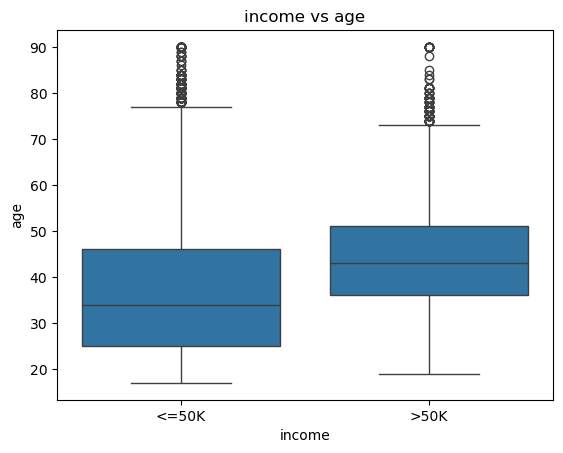

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='income',y='age',data=data)
plt.title('income vs age')
plt.show()

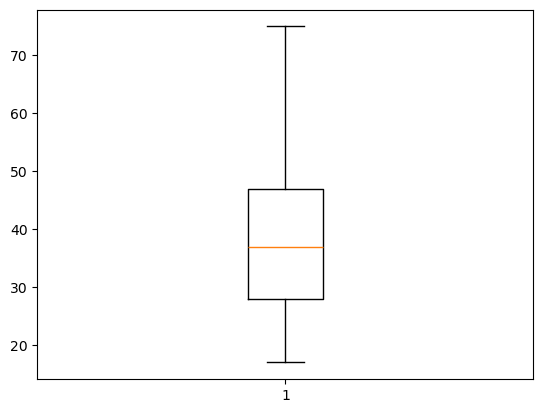

In [11]:
data=data[(data['age']<=75 )&(data['age']>=17)]
plt.boxplot(data['age'])
plt.show()

In [12]:
#label encoding and one-hot encoding
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
data['gender']=label_enc.fit_transform(data['gender'])
data['income']=label_enc.fit_transform(data['income'])
data=pd.get_dummies(data,columns=['workclass','occupation'],drop_first=True)


In [13]:
data.head(3)

,age,educational-num,gender,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_NotListed,workclass_Private,workclass_Self-emp-inc,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_NotListed,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,7,1,40,0,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1,38,9,1,50,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,28,12,1,40,1,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
X=data.drop('income',axis=1)
y=data['income']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#decision tree
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
dt_acc=accuracy_score(y_test,dt_model.predict(X_test))

#random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

#gradient boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_acc = accuracy_score(y_test, gb_model.predict(X_test))

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")

Decision Tree Accuracy: 0.7659
Random Forest Accuracy: 0.7868
Gradient Boosting Accuracy: 0.8131


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

final_model = GradientBoostingClassifier(random_state=42)
final_model.fit(X, y)

y_test_pred = final_model.predict(X_test)
print("Final Gradient Boosting Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['<=50K', '>50K']))


Final Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.89      7343
        >50K       0.68      0.46      0.55      2351

    accuracy                           0.82      9694
   macro avg       0.76      0.69      0.72      9694
weighted avg       0.80      0.82      0.80      9694



In [16]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib

final_model = GradientBoostingClassifier(random_state=42)
final_model.fit(X, y)

import cloudpickle

with open('final_salary_model1.joblib', 'wb') as f:
    cloudpickle.dump(final_model, f)


In [17]:
import sklearn
print(sklearn.__version__)


1.5.1


In [18]:
print(X.columns.tolist())
print(len(X.columns))


['age', 'educational-num', 'gender', 'hours-per-week', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_NotListed', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_NotListed', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving']
26


In [19]:
import joblib


feature_names = list(X.columns)  
joblib.dump(feature_names, 'feature_names.pkl')


['feature_names.pkl']